In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import pandas as pd


In [23]:
data = pd.read_csv('train.csv')
data = data.drop(columns=['id'])

In [25]:
data.head(5)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f282,f283,f284,f285,f286,f287,f288,f289,f290,target
0,2014-01-29,69,38.0,7.0,10.0,1.0,2001.0,2.0,11.0,2.0,...,1,0,0,2,8,1,0,19,2,9500000
1,2014-04-07,55,NaN,2.0,1.0,4.0,NaN,2.0,10.0,NaN,...,0,0,0,0,4,0,0,2,0,3837949
2,2012-05-18,30,16.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,46,9,2,11,38,1,8,97,11,6250000
3,2013-02-08,44,43.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,17,4,1,12,12,0,1,55,7,2000000
4,2014-01-10,45,28.0,3.0,5.0,2.0,1960.0,2.0,5.0,NaN,...,20,2,0,4,16,1,4,47,5,6700000


In [26]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24376 entries, 0 to 24375
Columns: 291 entries, f1 to target
dtypes: float64(119), int64(156), object(16)
memory usage: 54.1+ MB
None


# Категориальные признаки

In [138]:
tfm_data = data.copy()
tfm_data = tfm_data.drop(columns=['f1'])

##### Признаки 'f11','f29','f33','f34','f35','f36','f37','f38','f39','f40','f106','f114','f118' - не являются порядковыми. Преобразуем с помощью one-hot encoding 

In [140]:
tfm_data = pd.get_dummies(tfm_data, columns=['f11','f29','f33','f34','f35',
                                                               'f36','f37','f38','f39','f40','f106','f114','f118'], 
                                 prefix = ['f11','f29','f33','f34','f35',
                                                               'f36','f37','f38','f39','f40','f106','f114','f118'])
tfm_data.head()

,f2,f3,f4,f5,f6,f7,f8,f9,f10,f12,...,f39_no,f39_yes,f40_no,f40_yes,f106_no,f106_yes,f114_no,f114_yes,f118_no,f118_yes
0,69,38.0,7.0,10.0,1.0,2001.0,2.0,11.0,2.0,Juzhnoe Butovo,...,1,0,1,0,1,0,1,0,1,0
1,55,NaN,2.0,1.0,4.0,NaN,2.0,10.0,NaN,Poselenie Filimonkovskoe,...,1,0,1,0,1,0,1,0,1,0
2,30,16.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Lomonosovskoe,...,1,0,1,0,1,0,1,0,1,0
3,44,43.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Juzhnoe Tushino,...,1,0,1,0,1,0,1,0,1,0
4,45,28.0,3.0,5.0,2.0,1960.0,2.0,5.0,NaN,Ochakovo-Matveevskoe,...,1,0,1,0,1,0,1,0,1,0


##### признак f12 содержит информацию о райноне объекта. Заметим, что все объекты можно разделить на две группы: по числу обьектов из определеной группы районов.

C:\Users\ostap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


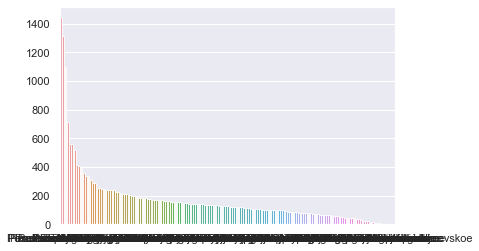

In [162]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = tfm_data['f12'].value_counts()
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.show()

In [177]:
gran = tfm_data['f12'].value_counts().mean() + 2*tfm_data['f12'].value_counts().std()

In [ ]:
Poselenie Sosenskoe                
Nekrasovka                         
Poselenie Vnukovskoe               
Poselenie Moskovskij  

In [198]:
tfm_data['f12'].apply(lambda x : 
                               x in ['Poselenie Sosenskoe','Nekrasovka','Poselenie Vnukovskoe','Poselenie Moskovskij'])

0        False
1        False
2        False
3        False
4        False
         ...  
24371     True
24372    False
24373    False
24374    False
24375     True
Name: f12, Length: 24376, dtype: bool

In [251]:
tfm_data["first"] = (tfm_data['f12'].apply(lambda x : 
                               x in ['Poselenie Sosenskoe','Nekrasovka','Poselenie Vnukovskoe','Poselenie Moskovskij'])).apply(int)
tfm_data["second"] = tfm_data['f12'].apply(lambda x : 
                               x not in ['Poselenie Sosenskoe','Nekrasovka','Poselenie Vnukovskoe','Poselenie Moskovskij']).apply(int)
tfm_data = tfm_data.drop(columns=['f12'])

In [262]:
rep_map = {'f152': {'excellent': 5, 'good': 4, 'satisfactory': 3, 'poor': 2,'no data': 1}}

In [268]:
tfm_data = tfm_data.replace(rep_map)

tfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24376 entries, 0 to 24375
Columns: 304 entries, f2 to second
dtypes: float64(119), int64(159), uint8(26)
memory usage: 52.3 MB


In [284]:
tfm_data

,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,...,f40_no,f40_yes,f106_no,f106_yes,f114_no,f114_yes,f118_no,f118_yes,first,second
0,69,38.0,7.0,10.0,1.0,2001.0,2.0,11.0,2.0,2.615514e+07,...,1,0,1,0,1,0,1,0,0,1
1,55,NaN,2.0,1.0,4.0,NaN,2.0,10.0,NaN,3.574795e+07,...,1,0,1,0,1,0,1,0,0,1
2,30,16.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.326419e+06,...,1,0,1,0,1,0,1,0,0,1
3,44,43.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7.887684e+06,...,1,0,1,0,1,0,1,0,0,1
4,45,28.0,3.0,5.0,2.0,1960.0,2.0,5.0,NaN,1.752651e+07,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24371,55,NaN,7.0,17.0,1.0,NaN,2.0,1.0,1.0,2.553630e+07,...,1,0,1,0,1,0,1,0,1,0
24372,43,28.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,7.887684e+06,...,1,0,1,0,1,0,1,0,0,1
24373,85,NaN,16.0,17.0,1.0,1.0,3.0,1.0,NaN,8.591335e+06,...,1,0,1,0,1,0,1,0,0,1
24374,47,27.0,2.0,10.0,2.0,1958.0,2.0,6.0,4.0,1.249544e+07,...,1,0,1,0,1,0,1,0,0,1


In [287]:
tfm_data['f88']

0         0.859306
1        12.654386
2         1.570647
3         0.834644
4         0.566241
           ...    
24371     2.285812
24372     2.318061
24373     2.077953
24374     1.096273
24375     2.285812
Name: f88, Length: 24376, dtype: float64

In [300]:
tfm_data.describe()['f88']

count    24354.000000
mean         3.568633
std          5.805452
min          0.000000
25%          0.951530
50%          1.700082
75%          3.776836
max         59.267984
Name: f88, dtype: float64

<AxesSubplot:>

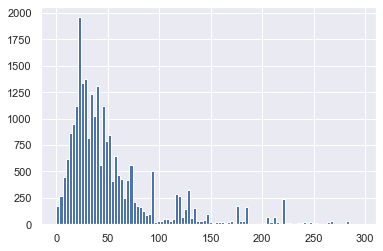

In [309]:
tfm_data['f98'].hist(bins=100)

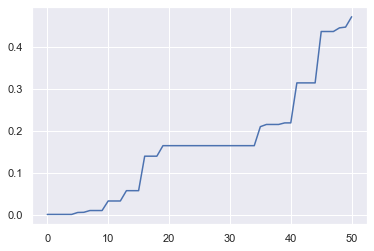

In [332]:
plt.plot(sorted(np.array(tfm_data.isnull().sum(axis=0)[tfm_data.isnull().sum(axis=0)>=1])/24376))

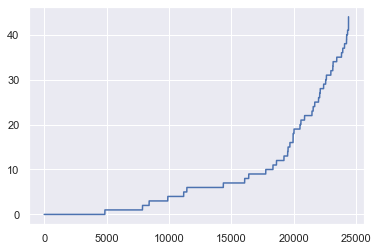

In [327]:
plt.plot(sorted(list(tfm_data.isnull().sum(axis=1))))

In [335]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(tfm_data.to_numpy())

tfm_data_nan = imp.transform(tfm_data.to_numpy())


In [340]:
tfm_data.columns.get_loc("target")

275

In [351]:
y = tfm_data_nan[:,275]

In [352]:
X =np.delete(tfm_data_nan, 275, 1)


In [346]:
tfm_data_nan.shape

(24376, 304)

In [353]:
X.shape

(24376, 303)

In [354]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

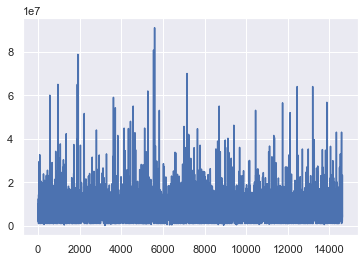

In [422]:
def funn(X,y,count):
    mean = np.log(y).mean()
    std = np.log(y).std()
    a = mean - count*std
    b = mean + count*std
    
    return X[np.where((np.log(y)<b)&(np.log(y)>a))], y[(np.where((np.log(y)<b)&(np.log(y)>a)))]

    
    

In [458]:
new_x, new_y =funn(X,y,2)

In [426]:
new_x.shape

(13766, 303)

In [427]:
new_y.shape

(13766,)

In [465]:
t = pd.read_csv('test.csv')
t = t.drop(columns=['id'])

In [466]:
t.

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290
0,2014-03-29,63,63.0,11.0,17.0,1.0,NaN,2.0,1.0,NaN,...,5,1,1,0,2,12,0,1,10,0
1,2013-02-19,64,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5,1,1,0,2,12,0,0,9,0
2,2013-09-18,40,NaN,4.0,17.0,1.0,NaN,1.0,1.0,NaN,...,636,371,141,26,150,249,2,105,203,13
3,2014-07-04,37,1.0,25.0,1.0,1.0,1.0,1.0,1.0,1.0,...,28,17,6,2,4,16,0,0,47,3
4,2014-09-24,127,58.0,11.0,20.0,1.0,2006.0,3.0,33.0,4.0,...,95,37,5,1,5,33,1,6,85,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,2014-12-16,59,36.0,14.0,1.0,1.0,NaN,2.0,9.0,NaN,...,3,1,0,0,1,6,0,0,6,1
6091,2014-06-28,65,43.0,10.0,12.0,1.0,1974.0,3.0,7.0,3.0,...,389,249,85,18,78,150,1,68,163,12
6092,2015-04-02,53,30.0,11.0,12.0,1.0,1984.0,2.0,8.0,3.0,...,46,10,4,0,15,20,1,0,55,4
6093,2014-07-31,37,18.0,5.0,5.0,1.0,2009.0,1.0,7.0,3.0,...,3,1,0,0,1,3,0,0,5,1


In [439]:
scaler = StandardScaler()
scaler.fit(new_x)
new_x = scaler.transform(new_x)
X_test = scaler.transform(X_test)

In [440]:
from sklearn import svm
regr = svm.SVR()
regr.fit(new_x, new_y)
answer = regr.predict(X_test)


In [443]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0)
regr.fit(new_x, new_y)
answer = regr.predict(X_test)


In [456]:
print((answer).mean())
print((y_test).mean())
print((y_test).std())
print((answer).std())




3580760.468417256
7146636.962773049
4894792.246486398
392637.10226207034


In [452]:
(answer-y_test).std()

4888080.779639253

In [448]:
y_test

array([11000000., 11450000.,  8650000., ...,  5150000.,  5658929.,
        6600000.])

In [444]:
np.sum((answer - y_test)**2)/len(y_test)

36608808881277.84

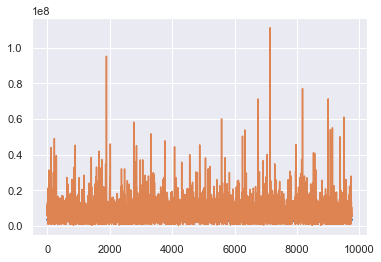

In [457]:
plt.plot((answer))
plt.plot((y_test))

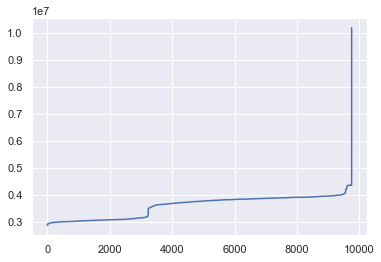

In [467]:
plt.plot(sorted(answer))

In [468]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, answer))

0.8055714198076108

In [27]:
#категориальные признаки
cat_data= data.select_dtypes(include=['object']).copy()

In [29]:
cat_data.head()

,f1,f11,f12,f29,f33,f34,f35,f36,f37,f38,f39,f40,f106,f114,f118,f152
0,2014-01-29,Investment,Juzhnoe Butovo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,2014-04-07,OwnerOccupier,Poselenie Filimonkovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
2,2012-05-18,Investment,Lomonosovskoe,no,no,no,no,no,no,no,no,no,no,no,no,satisfactory
3,2013-02-08,Investment,Juzhnoe Tushino,no,no,no,no,no,no,no,no,no,no,no,no,poor
4,2014-01-10,Investment,Ochakovo-Matveevskoe,no,yes,no,no,no,no,no,no,no,no,no,no,satisfactory


In [30]:
# Распределение NaN по столбцам
print(cat_data.isnull().sum())

f1      0
f11     0
f12     0
f29     0
f33     0
f34     0
f35     0
f36     0
f37     0
f38     0
f39     0
f40     0
f106    0
f114    0
f118    0
f152    0
dtype: int64


In [96]:
(pd.to_datetime(cat_data['f1']).apply(lambda x : x.year==2014))

0         True
1         True
2        False
3        False
4         True
         ...  
24371     True
24372    False
24373    False
24374     True
24375    False
Name: f1, Length: 24376, dtype: bool

In [124]:
cat_data.loc[(pd.to_datetime(cat_data['f1']).apply(lambda x : x.year==2014)),['f1']].index

Int64Index([    0,     1,     4,     5,     6,     9,    10,    12,    13,
               14,
            ...
            24359, 24360, 24362, 24364, 24365, 24366, 24368, 24369, 24371,
            24374],
           dtype='int64', length=10955)

<AxesSubplot:>

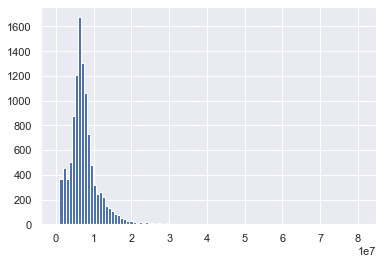

In [137]:
data.loc[cat_data.loc[(pd.to_datetime(cat_data['f1']).apply(lambda x : x.year==2014)),['f1']].index,'target'].hist(bins=100)

<AxesSubplot:>

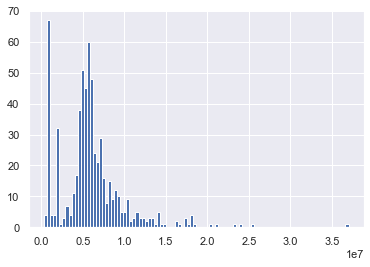

In [136]:
data.loc[cat_data.loc[(pd.to_datetime(cat_data['f1']).apply(lambda x : x.year==2011)),['f1']].index,'target'].hist(bins=100)

In [67]:
print(cat_data['f1'].value_counts())

2014-12-09    120
2014-12-16    117
2014-06-30    109
2014-12-18     99
2014-09-30     77
             ... 
2014-04-13      1
2013-08-11      1
2013-11-10      1
2014-11-03      1
2011-12-24      1
Name: f1, Length: 1156, dtype: int64


In [70]:
sorted(cat_data['f1'])[0]

'2011-08-20'

In [71]:
sorted(cat_data['f1'])[-1]

'2015-06-30'

In [72]:
sorted(cat_data['f1'])[-1]-sorted(cat_data['f1'])[0]

TypeError: unsupported operand type(s) for -: 'str' and 'str'

C:\Users\ostap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


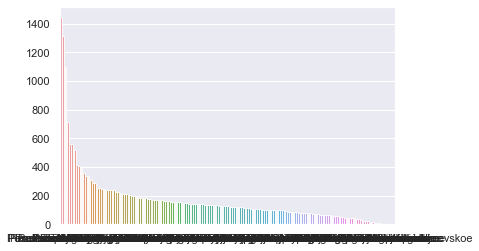

In [64]:
cat_data_onehot = cat_data.copy()
cat_data_onehot = pd.get_dummies(cat_data_onehot, columns=['f11','f29','f33','f34','f35',
                                                               'f36','f37','f38','f39','f40','f106','f114','f118'], 
                                 prefix = ['f11','f29','f33','f34','f35',
                                                               'f36','f37','f38','f39','f40','f106','f114','f118'])
cat_data_onehot.head()

,f1,f12,f152,f11_Investment,f11_OwnerOccupier,f29_no,f29_yes,f33_no,f33_yes,f34_no,...,f39_no,f39_yes,f40_no,f40_yes,f106_no,f106_yes,f114_no,f114_yes,f118_no,f118_yes
0,2014-01-29,Juzhnoe Butovo,good,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
1,2014-04-07,Poselenie Filimonkovskoe,no data,0,1,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
2,2012-05-18,Lomonosovskoe,satisfactory,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
3,2013-02-08,Juzhnoe Tushino,poor,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
4,2014-01-10,Ochakovo-Matveevskoe,satisfactory,1,0,1,0,0,1,1,...,1,0,1,0,1,0,1,0,1,0


In [312]:
tfm_datajjj =  clean_log_target(tfm_data,2)

<AxesSubplot:>

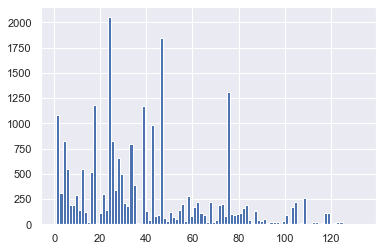

In [323]:
tfm_datajjj['f99'].hist(bins = 100)

In [ ]:
plt.plot(range(0,len(data)), sorted(data['target']))

In [ ]:
data.hist('target',bins =500)

In [ ]:
np.log(data.target).hist(bins = 100)

In [311]:
def clean_log_target(data,count):
    mean = np.log(data.target).mean()
    std = np.log(data.target).std()
    a = mean - count*std
    b = mean + count*std
    return data[(np.log(data.target) > a)&(np.log(data.target) < b)]

    
    
    

In [ ]:
def clean_target(data,count):
    mean = data.target.mean()
    std = data.target.std()
    a = mean - count*std
    b = mean + count*std
    return data[((data.target) > a)&((data.target) < b)]
    
    
    

In [ ]:
ndata_log = clean_log_target(data,2)
ndata = clean_target(data,2)

In [ ]:
len(ndata_log)/len(data)

In [ ]:
len(ndata)/len(data)

In [ ]:
plt.plot(range(0,len(ndata)), sorted(ndata['target']))

In [ ]:
ndata.hist('target',bins =100)


In [ ]:
np.log(ndata.target).hist(bins = 100)

In [ ]:
plt.plot(range(0,len(ndata_log)), sorted(ndata_log['target']))

In [ ]:
ndata_log.hist('target',bins =100)

In [ ]:
np.log(ndata_log.target).hist(bins = 100)

In [ ]:
ndata_log['f152']

In [ ]:
ndata_log.groupby('f40')['id'].nunique()

In [ ]:
ndata_log.replace('no', 0).replace('yes', 1).loc[:, ndata_log.dtypes == object ]

In [ ]:
ndata_log['f12']

In [ ]:
ndata_log.loc[ndata_log['f12']]

In [ ]:
ndata_log.info('f1')

In [ ]:
ndata_log.groupby('f1')['id'].nunique().sort_values()


In [ ]:
ndata_log.value_counts(ndata_log['f1']).plot.bar()

In [ ]:
ndata_log.f1

In [ ]:
ndata['f24']

In [ ]:
ndata.isnull().sum(axis=0)[ndata.isnull().sum(axis=0)>=1]

In [ ]:
ndata[ndata.isnull().sum(axis=1)>10] 

In [ ]:
ndata.isnull().sum(axis=1)